In [234]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.python.framework import ops
from mlxtend.plotting import plot_decision_regions
ops.reset_default_graph()

## 1. The XOR data


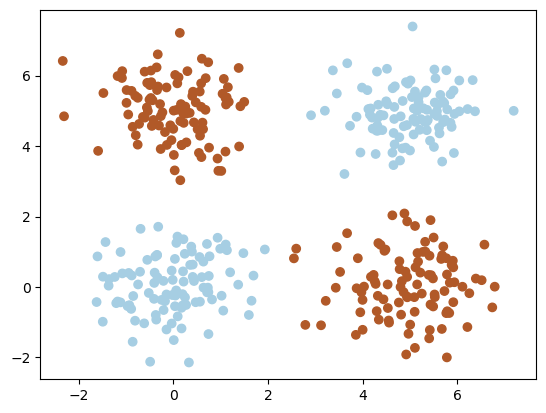

In [235]:
# We create four blobs with different centers to create the original data
centers = ([0, 0], [0, 5], [5, 0], [5, 5])
X, y = datasets.make_blobs(n_samples=400, centers = centers, cluster_std=0.8)
# Reduce the classes to two classe simulating the XOR problem 
y[y == 3] = 0
y[y == 2] = 1
# Plotting
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

## 2. Create the Logistic Regression Model Structure.

We will use keras to create our Logistic Regresson Model. Specifically we will use the class Sequential, where we can create a model layer by layer -- this would be specially interesting where working with neural nets.

There are different types of layers. We will use two in particular, the layer Input (just for holding our input vectors) and the Layer "Dense". A "Dense layer" indicates that the units of the layer are fully connected with the input layer units https://keras.io/api/layers/core_layers/dense/

For further information please have a look into the keras documentation

https://keras.io/api/layers/

In [236]:
binary_logistic_regressor = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"), 
    layers.Dense(units=2, activation="sigmoid"),                                       
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [237]:
# we can use the summary function to inspect the layers of our model 
binary_logistic_regressor.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

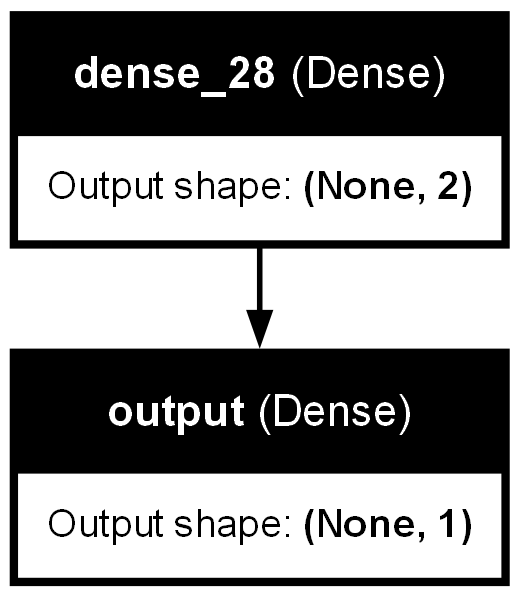

In [238]:
tf.keras.utils.plot_model(binary_logistic_regressor, show_layer_names=True, show_shapes=True)

In [239]:
binary_logistic_regressor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [240]:
history = binary_logistic_regressor.fit(X, y, epochs=100, verbose=0, validation_split = 0.2)

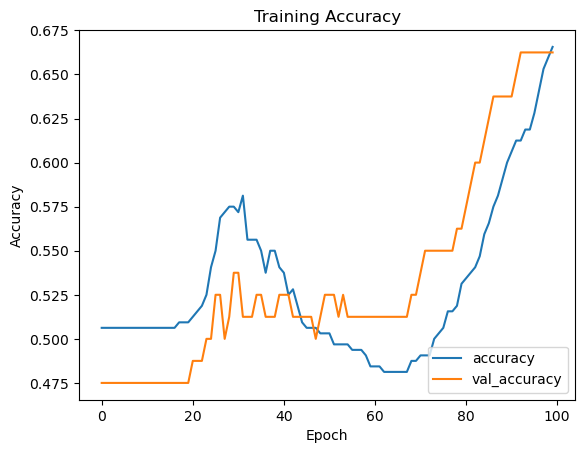

In [241]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.show()


In [242]:
binary_logistic_regressor.trainable_variables


[<KerasVariable shape=(2, 2), dtype=float32, path=sequential_20/dense_28/kernel>,
 <KerasVariable shape=(2,), dtype=float32, path=sequential_20/dense_28/bias>,
 <KerasVariable shape=(2, 1), dtype=float32, path=sequential_20/output/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_20/output/bias>]

In [243]:
weights_hidden = binary_logistic_regressor.get_weights()[0]  # Weight matrix of shape (2, 2)
bias_hidden = binary_logistic_regressor.get_weights()[1]     # Bias vector of shape (2,)
weights_output = binary_logistic_regressor.get_weights()[2]  # Weight matrix of shape (2, 1)
bias_output = binary_logistic_regressor.get_weights()[3]     # Bias vector of shape (1,)


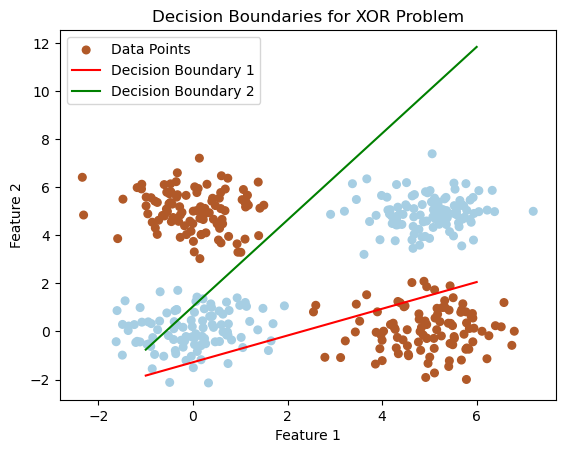

In [244]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired, label='Data Points')

# Define the decision boundary lines
x_values = np.linspace(-1, 6, 100)
y_values1 = (-weights_hidden[0, 0] * x_values - bias_hidden[0]) / weights_hidden[1, 0]
y_values2 = (-weights_hidden[0, 1] * x_values - bias_hidden[1]) / weights_hidden[1, 1]

# Plot the decision boundary lines
plt.plot(x_values, y_values1, label='Decision Boundary 1', color='r')
plt.plot(x_values, y_values2, label='Decision Boundary 2', color='g')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries for XOR Problem')
plt.legend()
plt.show()
